In [2]:
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import itertools

In [3]:
model=load_model('../tomatoes.h5')

Classes= ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [4]:
# Pre-Processing test data same as train data.

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img) #converting to array
    x = x/255 #rescaling
    return model.predict(tf.expand_dims(x, axis=0)) #converting a single image to a batch

Predicted: Tomato__Tomato_YellowLeaf__Curl_Virus
Confidence: 98.7%


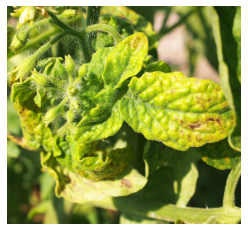

In [5]:
result = predict_image("Tomato-Leaf-Curl.jpg")
disease=image.load_img('Tomato-Leaf-Curl.jpg')
plt.imshow(disease)
print (f"Predicted: {Classes[np.argmax(result)]}")
plt.axis("off")
confidence = round(100 * (np.max(result)), 2)
print(f"Confidence: {confidence}%")

In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(256,256),
    batch_size=64,
    shuffle=True,
    class_mode='sparse', #0,1,2 
)


Found 1610 images belonging to 10 classes.


In [7]:
def predict(model, img, pred_label=None):
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #add an extra dimension 

    predictions = model.predict(img_array) #trained model makes a predicton on the single image 

    predicted_class = Classes[np.argmax(predictions)] 
    confidence = round(100 * (np.max(predictions)), 2)
    
    pred_label = np.argmax(predictions)
    
    
    return predicted_class, confidence, pred_label

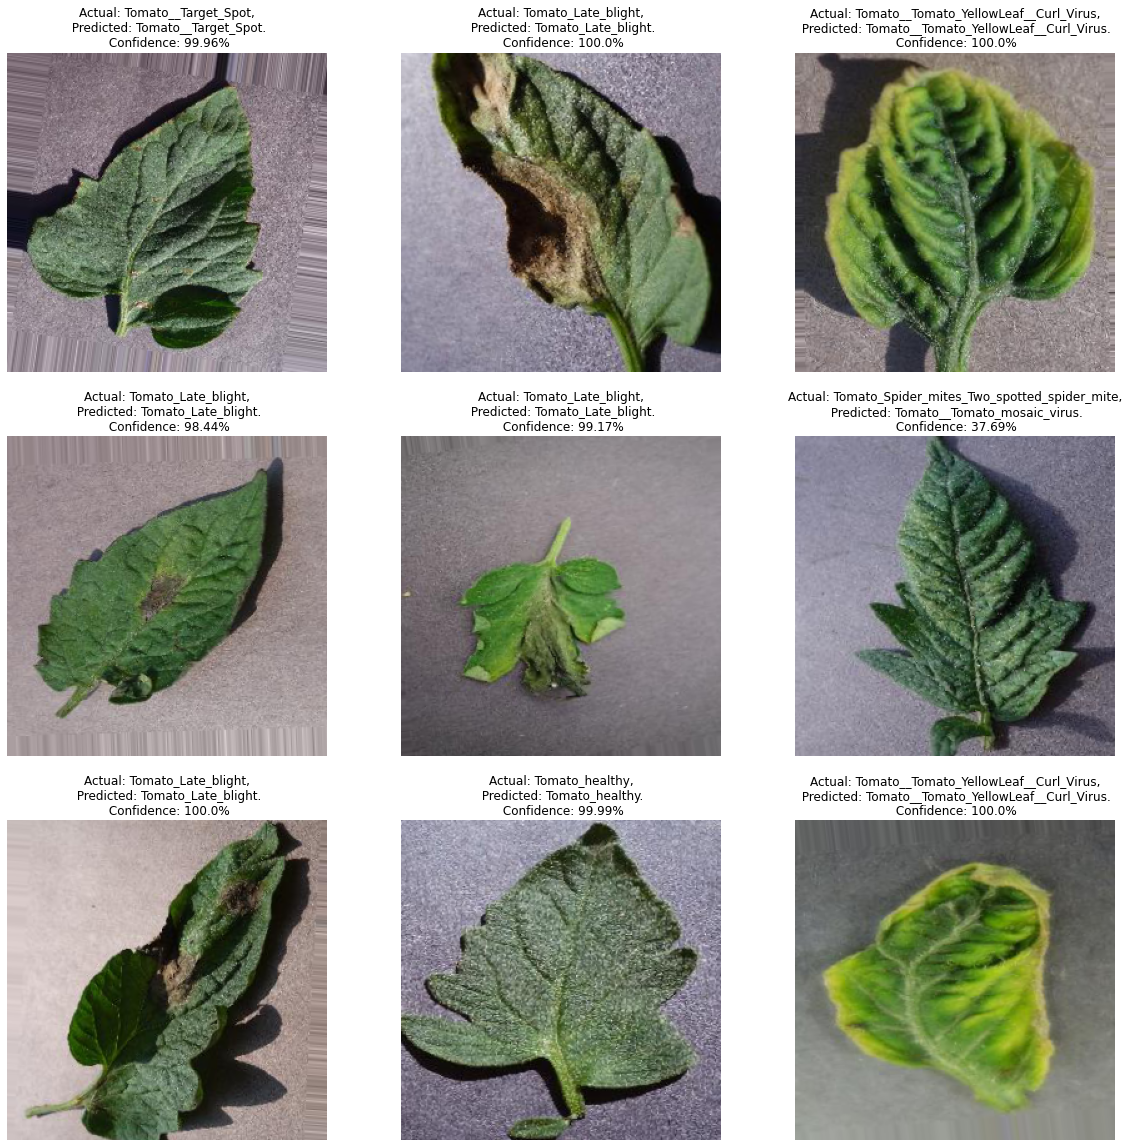

In [12]:
#Now run inference on few sample images

plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence, pred_label = predict(model, images[i])
        actual_class = Classes[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    
    break


In [30]:
#Now run inference on few sample images

y_true = []
y_pred = []

for images, labels in test_generator:
    for i in range(64):

        predicted_class, confidence, pred_label = predict(model, images[i])
        true_label= int(labels[i])

        y_true.append(true_label)
        y_pred.append(pred_label)
    
    break
    
#print(y_true)
#print(y_pred)

print(classification_report(y_true, y_pred))

acc = round(100*(accuracy_score(y_true, y_pred)),2)
prec = round(100*(precision_score(y_true, y_pred, average= "weighted", zero_division=0)),2)
fscore = round(100*(f1_score(y_true, y_pred, average= "weighted", zero_division=0)),2)
recall = round(100*(recall_score(y_true, y_pred, average="weighted", zero_division=0)),2)

print(f"Accuracy score: {acc}%\nPrecision score: {prec}%\nF1 score: {fscore}%\nRecall score: {recall}%")

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         6

    accuracy                           0.97        64
   macro avg       0.98      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64

Accuracy score: 96.88%
Precision score: 97.24%
F1 score: 96.66%
Recall score: 96.88%


In [31]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(10), classes, rotation=90)
    plt.yticks(np.arange(10), classes)
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center", verticalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    #As you can see, this is a good way we can visually interpret how well the model is doing at its predictions 
    #and understand where it may need some work.

Confusion matrix, without normalization
[[ 7  0  0  0  0  0  0  0  0  0]
 [ 1  4  0  0  1  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  6]]


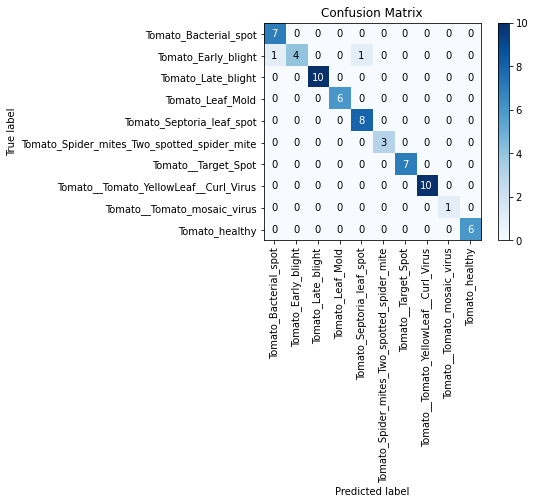

In [32]:
cm = confusion_matrix(y_true=y_true,y_pred=y_pred)
plot_confusion_matrix(cm=cm, classes=Classes, title='Confusion Matrix')


In [33]:
model.evaluate(test_generator)

26/26 [==============================] - 25s 943ms/step - loss: 0.2306 - accuracy: 0.9410


[0.2306164801120758, 0.9409937858581543]

F1 Score: It's the harmonic mean of precision and recall, a metric that balances both values.
Accuracy: Proportion of correct predictions in the whole set of predictions made.
Precision: Proportion of correct positive predictions out of total positive predictions made.
Recall: Proportion of correct positive predictions made out of all actual positive instances.

In [34]:
model.save("../tom_testing.h5")
model.save_weights("../tom_test_weights.h5")